In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot



# Read CSV
dataset = pd.read_csv('CE802_P2_Data.csv')
print(dataset.shape)

(1000, 22)


In [2]:
print(dataset.columns)

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'Class'],
      dtype='object')


In [3]:
dataset['Class'].value_counts()

True     506
False    494
Name: Class, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   int64  
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   int64  
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [5]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.96,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.7488,-2141.76,0,10.2728,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.22,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.1780,-1706.22,0,13.9980,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.18,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.7280,-2513.25,0,11.7780,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.24,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.5731,-2207.67,0,10.1102,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.67,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.8289,507.78,0,10.3512,3246.40,2.04,12121.71,15.52,False


In [6]:
def minMax(x):
    return pd.Series(index=['min','max','mean','median'],data=[x.min(),x.max(),x.mean(),x.median()])


dataset.apply(minMax)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
min,12.124140,-7.071000,-4514.190000,0.264400,-176.060000,-12903.460000,4.361290,-14.904000,-9.175000,0.000,...,-7974.590000,-21.234000,-7087.920000,0.000,9.124440,-6828.000000,0.040,3628.410000,11.34000,False
max,25.326000,-3.530592,21120.810000,9.244000,-12.504656,100070.540000,8.813000,-1.446360,-4.622990,1.000,...,4355.410000,-3.780003,2605.080000,1.000,18.150000,11218.000000,2.040,29764.410000,18.15000,True
mean,15.045798,-4.304597,9930.685469,2.175746,-32.804599,-5370.578579,5.260013,-4.412875,-5.558608,0.481,...,-3417.225867,-5.232791,-2165.320822,0.507,10.968717,3133.607898,1.098,13069.938917,14.71352,0.506
median,14.174400,-4.170750,10345.740000,1.607400,-26.664000,-5467.898200,4.988750,-3.576750,-5.277250,0.000,...,-3623.790000,-4.480800,-2326.830000,1.000,10.458100,3510.900000,2.040,12711.945000,14.66500,1.0


In [7]:
dataset1 = dataset.copy() 


for eachCol in list(dataset.columns):
  median = dataset1[eachCol].median()
  std = dataset1[eachCol].std()
  outliers = (dataset1[eachCol] - median).abs() > std
  dataset1[outliers] = np.nan
  dataset1[eachCol].fillna(median, inplace=True)

#dataset1.fillna(dataset1.mean()) 
dataset1.apply(minMax)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
min,12.456000,-4.181300,10348.560000,1.00840,-25.764000,-5470.094200,4.388170,-4.23660,-5.975000,0.0,...,-4218.490000,-4.355400,-2688.75000,0.0,10.836600,3372.000000,2.04,12317.31000,14.37000,0.0
max,15.732000,-3.744500,10819.020000,2.32400,-13.127200,-5199.260000,5.687000,-1.54476,-4.891200,0.0,...,-3538.390000,-4.069890,-2209.68000,0.0,12.502000,3996.400000,2.04,12655.54500,14.41000,0.0
mean,14.176554,-4.165013,10350.499632,1.53581,-25.717236,-5469.508312,5.045366,-3.80737,-5.539957,0.0,...,-3539.725448,-4.355016,-2318.04668,0.0,11.177557,3493.981208,2.04,12654.75771,14.40996,0.0
median,14.174400,-4.166800,10348.560000,1.53470,-25.764000,-5470.094200,5.045850,-3.81180,-5.540000,0.0,...,-3538.390000,-4.355400,-2317.80000,0.0,11.176000,3493.520000,2.04,12655.54500,14.41000,0.0


In [8]:
dataset2 = dataset.copy() 

dataset2['F6'].value_counts()


-5505.520    2
-5536.580    2
-5514.320    2
-5441.420    2
-5421.280    2
            ..
-5463.948    1
-5414.620    1
-5450.374    1
-5413.480    1
-5409.040    1
Name: F6, Length: 985, dtype: int64

In [9]:
dataset2['F9'].value_counts()

-5.8440    3
-5.7330    3
-5.6680    2
-4.7236    2
-6.7640    2
          ..
-4.6447    1
-8.1750    1
-4.9689    1
-5.8630    1
-4.9253    1
Name: F9, Length: 951, dtype: int64

In [10]:
dataset.nunique()

F1       942
F2       943
F3       974
F4       946
F5       947
F6       985
F7       948
F8       955
F9       951
F10        2
F11      980
F12      982
F13      973
F14      974
F15      979
F16        2
F17      936
F18      976
F19        2
F20      983
F21      294
Class      2
dtype: int64

In [11]:
dataset[dataset.columns[:]].corr()['Class'][:]

F1      -0.022172
F2       0.026389
F3      -0.000403
F4       0.048997
F5      -0.045664
F6      -0.031054
F7      -0.007510
F8       0.028876
F9       0.039024
F10      0.010464
F11     -0.009307
F12      0.027641
F13      0.258222
F14      0.018146
F15     -0.012088
F16      0.029837
F17      0.069685
F18      0.018274
F19      0.041377
F20      0.216721
F21      0.516717
Class    1.000000
Name: Class, dtype: float64

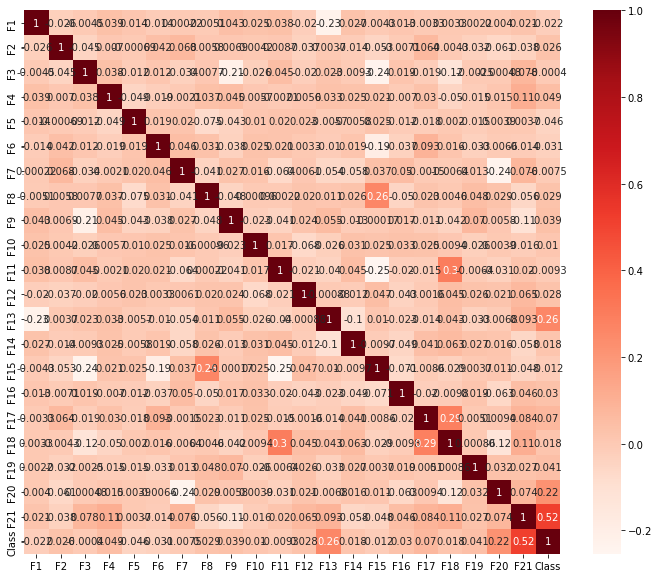

In [12]:
plot.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plot.cm.Reds)
plot.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

F13      0.258222
F20      0.216721
F21      0.516717
Class    1.000000
Name: Class, dtype: float64

array([[<AxesSubplot:xlabel='F8', ylabel='F8'>,
        <AxesSubplot:xlabel='F17', ylabel='F8'>,
        <AxesSubplot:xlabel='F21', ylabel='F8'>],
       [<AxesSubplot:xlabel='F8', ylabel='F17'>,
        <AxesSubplot:xlabel='F17', ylabel='F17'>,
        <AxesSubplot:xlabel='F21', ylabel='F17'>],
       [<AxesSubplot:xlabel='F8', ylabel='F21'>,
        <AxesSubplot:xlabel='F17', ylabel='F21'>,
        <AxesSubplot:xlabel='F21', ylabel='F21'>]], dtype=object)

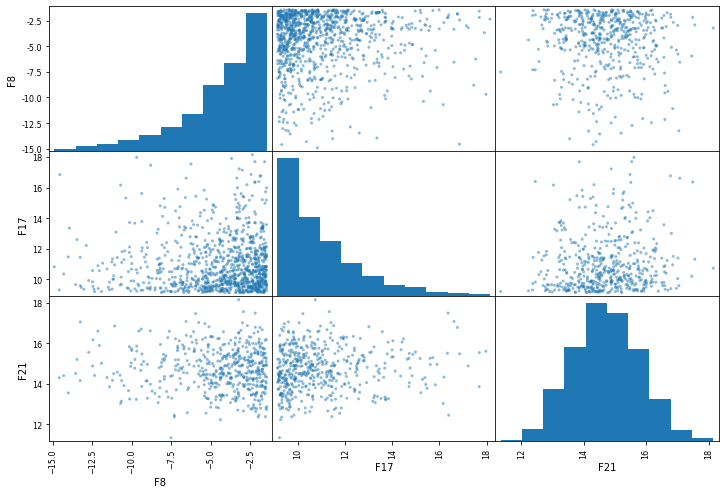

In [14]:
from pandas.plotting import scatter_matrix
attributes = ['F8','F17','F21']
scatter_matrix(dataset[attributes], figsize=(12, 8))

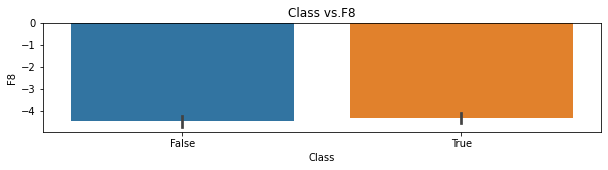

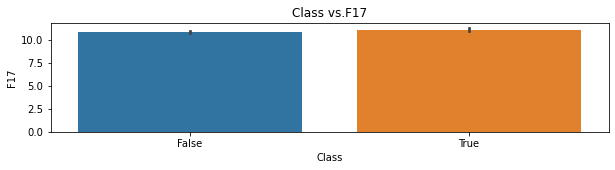

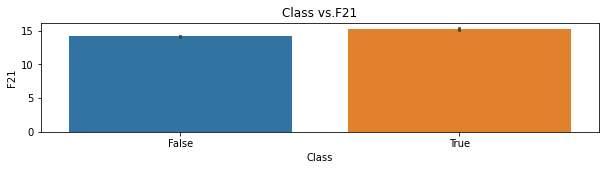

In [15]:
for eachCol in attributes:
  fig, (axis1) = plot.subplots(1,figsize=(10,2))
  axis1.title.set_text('Class vs.'+eachCol)
  sns.barplot(x='Class', y= eachCol, data=dataset, ax=axis1)

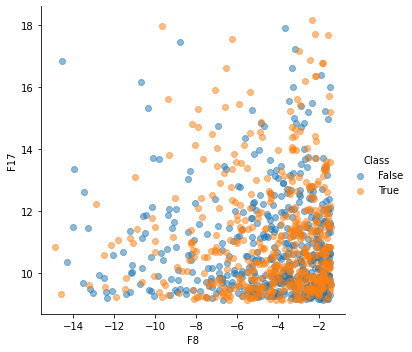

In [16]:
sns.lmplot(x='F8', y='F17', hue='Class', data=dataset, fit_reg=False, scatter_kws={'alpha':0.5});

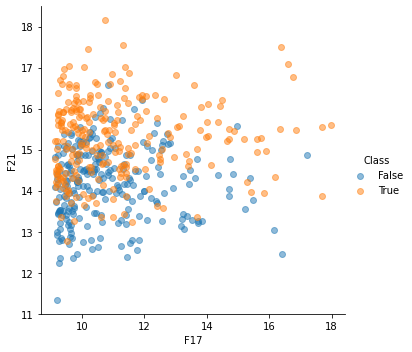

In [17]:
sns.lmplot(x='F17', y='F21', hue='Class', data=dataset, fit_reg=False, scatter_kws={'alpha':0.5});

<AxesSubplot:ylabel='Frequency'>

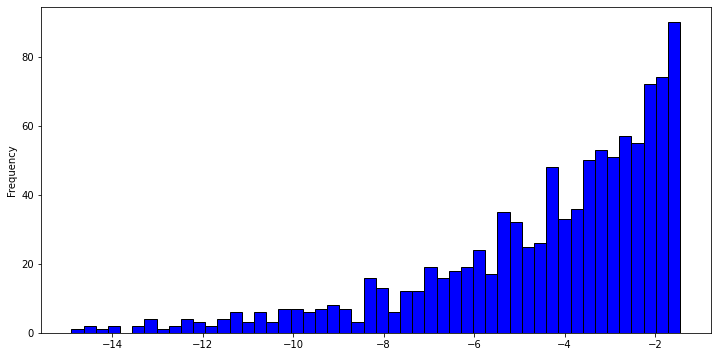

In [18]:
dataset['F8'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

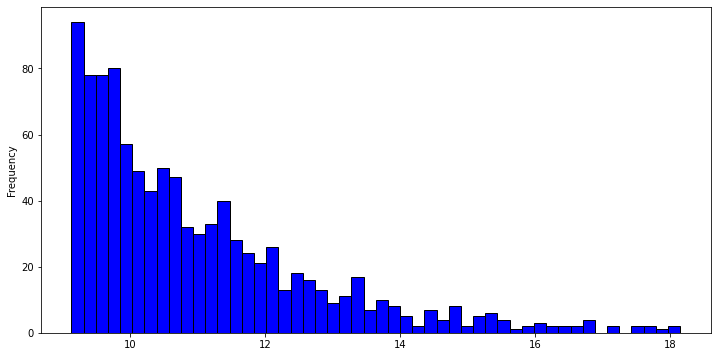

In [19]:
dataset['F17'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

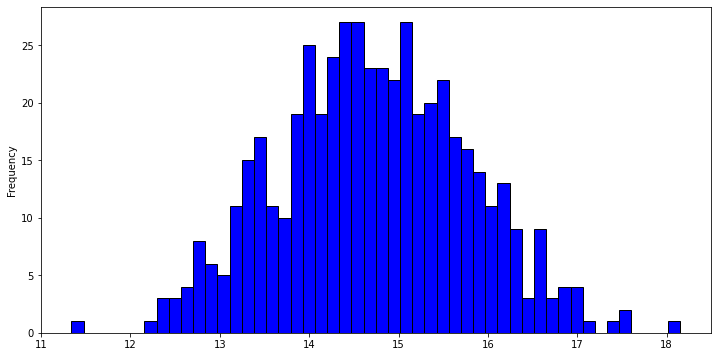

In [20]:
dataset['F21'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

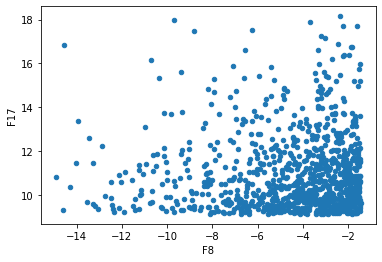

In [21]:
dataset.plot(kind ='scatter', x='F8', y='F17')
plot.show()

/Users/dorairajeshwar/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


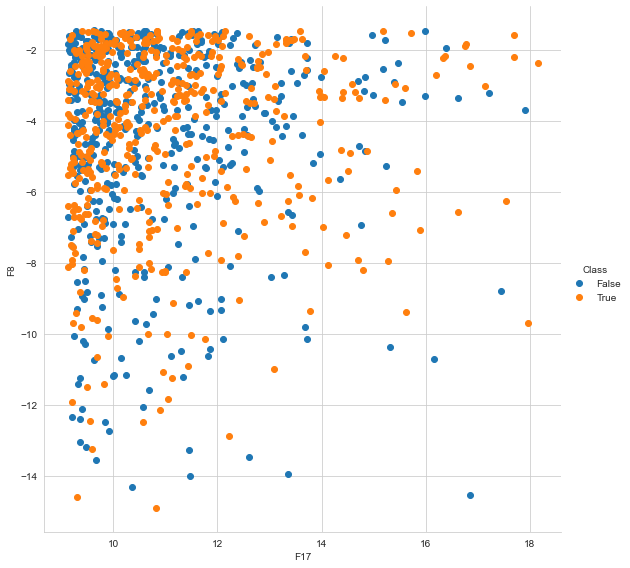

In [22]:
sns.set_style('whitegrid');
sns.FacetGrid(dataset, hue ='Class', size = 8).map(plot.scatter ,"F17","F8").add_legend()
plot.show()

In [23]:
filterDataset = dataset[['F8', 'F16','F17','Class']].copy()
filterDataset.head()

,F8,F16,F17,Class
0,-3.2322,0,10.2728,True
1,-2.7708,0,13.9980,False
2,-5.0070,0,11.7780,True
3,-4.1715,0,10.1102,True
4,-1.6536,0,10.3512,False


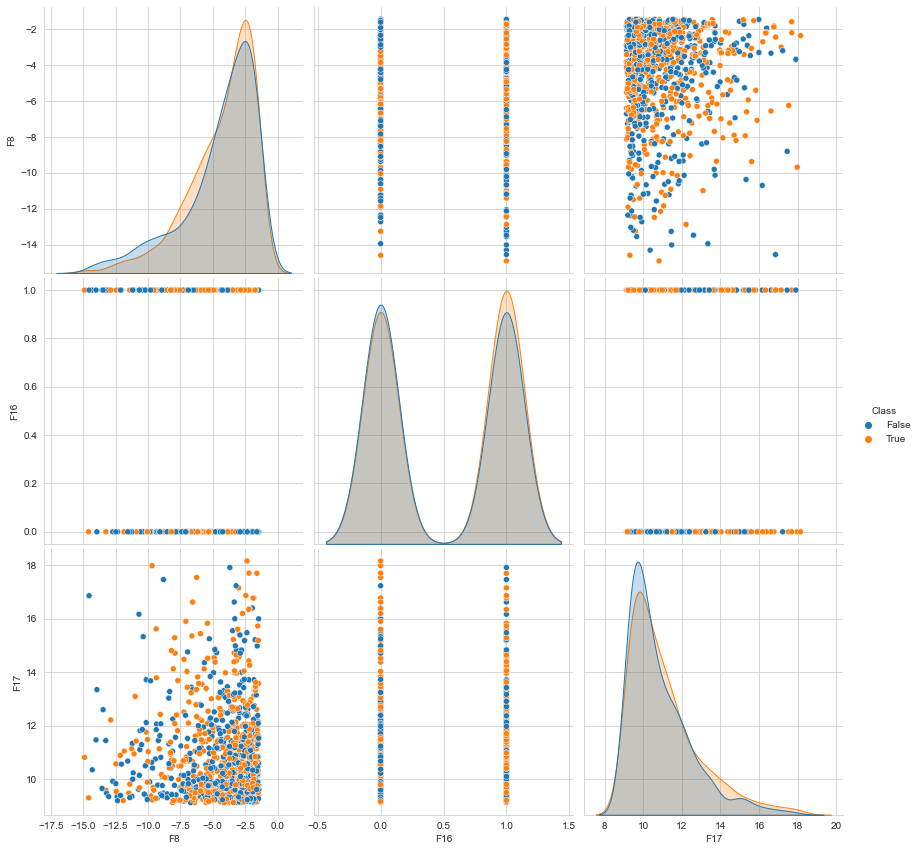

In [24]:
sns.set_style('whitegrid');
sns.pairplot(filterDataset, hue ='Class', height = 4)
plot.show()

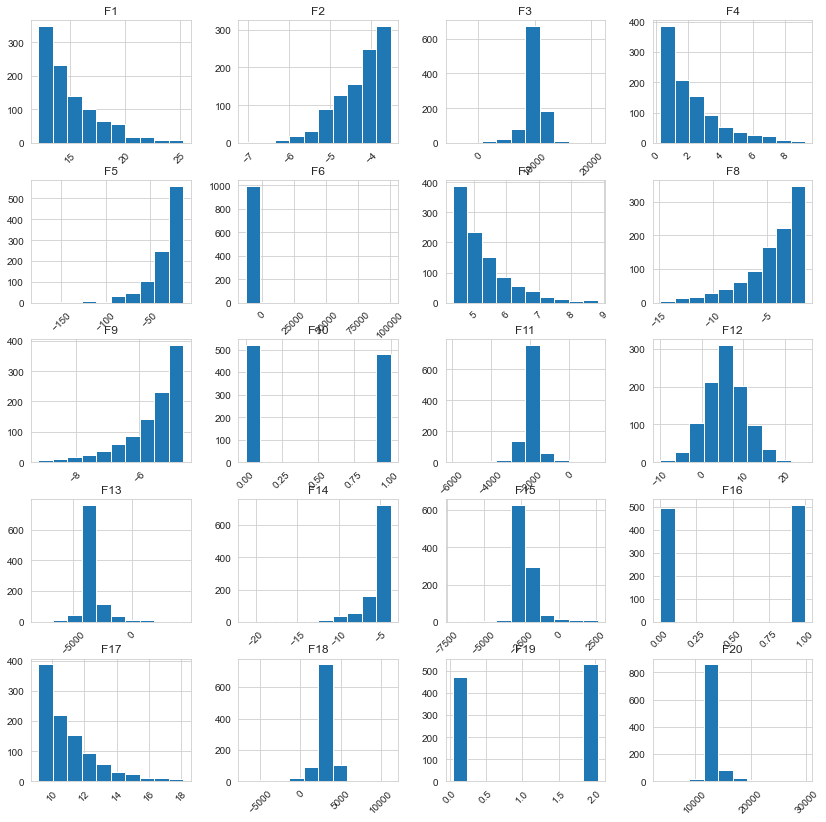

In [25]:
ds = dataset.drop(['F21','Class'], axis=1)

ds.hist(figsize=(14,14), xrot=45)
plot.show()

In [26]:

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.96,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.7488,-2141.76,0,10.2728,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.22,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.1780,-1706.22,0,13.9980,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.18,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.7280,-2513.25,0,11.7780,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.24,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.5731,-2207.67,0,10.1102,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.67,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.8289,507.78,0,10.3512,3246.40,2.04,12121.71,15.52,False


In [28]:
y_train = dataset['Class']
dataset = dataset.iloc[:,:-1].copy()
dataset['F21'].fillna(dataset['F21'].median(), inplace=True)

train_X, test_X, train_Y, test_Y = train_test_split(dataset, y_train, test_size=0.30,random_state=1)

In [29]:
print(test_Y.head())

507     True
818    False
452     True
368     True
242    False
Name: Class, dtype: bool


In [42]:
DT = DecisionTreeClassifier()
DT.fit(train_X,train_Y)
predicted_DT=DT.predict(test_X)

print(predicted_DT)

print(metrics.accuracy_score(test_Y,predicted_DT))

[ True  True  True  True False  True  True False  True  True  True  True
  True  True False False False False False  True False False False False
  True False False False False  True  True  True False  True  True False
 False False  True False False False  True  True  True False  True  True
  True False  True False  True False False  True  True False  True  True
  True False False  True False  True  True False  True False False False
 False False  True False  True  True  True False False False  True  True
 False  True False False False False  True False  True False False False
  True  True  True False False False False  True  True  True False  True
 False False False False False False  True  True  True  True  True False
 False  True  True  True False False  True  True False False  True False
  True  True  True False False False False False False  True  True False
 False False False False  True  True False  True False  True  True False
 False False  True False False False False  True  T

In [43]:
svc = SVC()
svc.fit(train_X,train_Y)
predicted_svc=svc.predict(test_X)
print(predicted_svc)
print(metrics.accuracy_score(test_Y,predicted_svc))

[False False  True  True False False False  True False  True  True False
 False False False False False False False False  True False False False
 False False False False False  True  True  True  True False  True False
 False False False False False False  True False False False False  True
  True  True  True False False  True False False False  True False  True
 False False False False  True False  True False False False False  True
 False False False  True False  True False False False False False  True
 False  True False False False  True  True False  True False False False
 False False  True False False  True False  True False  True  True  True
 False False False False False False  True  True  True False False  True
 False False  True False False False False False False False  True False
 False False False False False False False False  True False  True False
 False False False False  True  True False  True False  True  True  True
 False False  True False False False False False Fa

In [44]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
predicted_knn=knn.predict(test_X)
print(predicted_knn)
print(metrics.accuracy_score(test_Y,predicted_knn))

[ True False  True  True False  True  True  True  True False False False
 False False False False  True False False  True  True False False False
 False  True  True False False  True  True False  True  True False  True
 False False  True  True False False  True False False  True False  True
  True  True  True False False  True  True  True False  True False  True
 False False False  True  True  True  True False  True False False  True
  True False False  True  True  True False False  True  True  True  True
 False  True False  True False  True  True False False False  True False
 False False  True False  True  True False  True  True  True  True  True
 False False False False False  True  True  True  True False False False
 False False  True False False False False False False False  True False
 False  True False False False False  True  True False False  True False
  True False  True False  True  True False  True False  True  True False
 False False  True False False False False False Fa

In [45]:

from sklearn.metrics import precision_score
precision_score(test_Y, predicted_DT, average=None)

array([0.84313725, 0.84353741])

In [46]:
from sklearn.metrics import recall_score
recall_score(test_Y, predicted_DT, average=None)

array([0.84868421, 0.83783784])

In [47]:
from sklearn.metrics import f1_score
f1_score(test_Y, predicted_DT, average=None)

array([0.84590164, 0.84067797])

In [56]:
# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,12.19434,-4.04080,12708.21,0.8192,-26.032,-5646.14,5.4150,-1.91220,-4.6902,0,...,668.41,-3.88908,-2164.23,0,10.7196,3054.800,0.04,12826.86,NaN,NaN
1,19.70700,-5.18200,9651.81,1.0418,-19.454,-5541.68,5.2977,-6.02700,-5.7030,1,...,-3801.77,-3.98199,-2175.45,0,12.6300,3427.200,0.04,13053.51,14.37,NaN
2,13.80600,-5.71600,10903.71,0.4244,-50.720,-5488.61,5.2426,-4.63500,-5.2647,0,...,-3133.29,-5.56230,-2533.92,1,11.4600,3663.620,2.04,13007.01,NaN,NaN
3,13.30020,-5.03500,10830.03,1.1048,-28.166,-5395.76,4.6071,-1.56057,-5.9650,0,...,-4097.59,-4.52190,-1490.52,0,13.0920,3343.800,2.04,12465.30,NaN,NaN
4,14.20890,-3.56282,9547.11,3.0220,-38.220,-5389.22,5.3580,-4.06650,-5.2520,1,...,-3419.89,-7.81800,-2260.41,1,14.2720,3763.838,2.04,12859.71,NaN,NaN


In [59]:
test_data = test_df.iloc[:,:-1].copy()
test_data['F21'].fillna(test_data['F21'].median(), inplace=True)
predicted = DT.predict(test_data)
print(predicted)

[ True False  True  True  True False  True False  True False False  True
 False  True False False False  True False  True  True  True  True  True
  True  True  True False  True False  True  True False  True  True  True
  True False  True  True False False  True False False False False  True
  True False  True  True False False  True  True False  True  True  True
 False  True  True  True  True False  True False False False  True False
  True False  True  True  True  True  True False  True  True False False
  True False  True False  True False False  True False False  True  True
  True False  True  True  True  True False  True  True False  True False
  True  True False  True False  True  True  True  True False False  True
  True False  True  True  True  True  True  True False  True False False
  True False  True  True  True  True False False  True  True False False
 False False False  True False False  True  True False  True  True  True
  True  True  True  True False False  True  True  T

In [60]:
test_df.iloc[:,-1] = predicted
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])